# **McDonalds Case Study**

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Formatting
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
data = pd.read_csv('mcdonalds.csv')

In [113]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


## Data Exploration

In [ ]:
data.shape

(1453, 15)

In [ ]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
data = data.replace({"Yes": 1, "No": 0})

## Descriptive Statistics

In [ ]:
data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,"1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00"
mean,0.55,0.91,0.09,0.87,0.53,0.90,0.60,0.64,0.36,0.20,0.24,44.60
std,0.50,0.29,0.29,0.34,0.50,0.30,0.49,0.48,0.48,0.40,0.43,14.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00
25%,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,33.00
50%,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,45.00
75%,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,57.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,71.00


## Principal components analysis

In [ ]:
# getting first 11 columns
pca_data = data.iloc[:, : 11]
pca_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


### Scaling data using StandardScalar

In [ ]:
# one way to do scaling
# scaling down values
scaler = StandardScaler()
scal_fit = scaler.fit_transform(pca_data)

scal_fit

# scaled_data = scaler.transform(scal_fit)
# scaled_data

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.339489  ,
         2.00690848, -0.56648839],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.74655335,
         2.00690848, -0.56648839],
       [-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882,  1.76526126]])

In [ ]:
# scaling down values
scaler = StandardScaler()
scaler.fit(pca_data)

scaled_data = scaler.transform(pca_data)

pca = PCA()
pca.fit(scaled_data)

PCA()

### Scores values

In [ ]:
scores = pca.transform(scaled_data)
col_labels = ["PC" + str(x) for x in range(1, scores.shape[1] + 1)]
scores_df = pd.DataFrame(scores, columns = col_labels)
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.70,-0.44,0.27,-0.87,-1.52,0.47,-0.03,-0.69,0.37,0.32,1.70
1,-0.47,0.36,-1.60,-0.00,0.46,-0.45,0.09,0.45,0.22,0.19,1.47
2,0.19,1.71,-0.34,3.37,-1.27,0.15,-0.61,-0.67,1.38,-1.26,-0.13
3,-0.12,-1.16,-1.00,0.47,1.14,-0.86,0.02,0.39,-1.58,0.09,-0.23
4,-0.03,-1.39,0.79,0.47,-0.27,-0.85,-1.80,-0.70,1.63,0.09,-0.03


### Explained Variance for each PC

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]

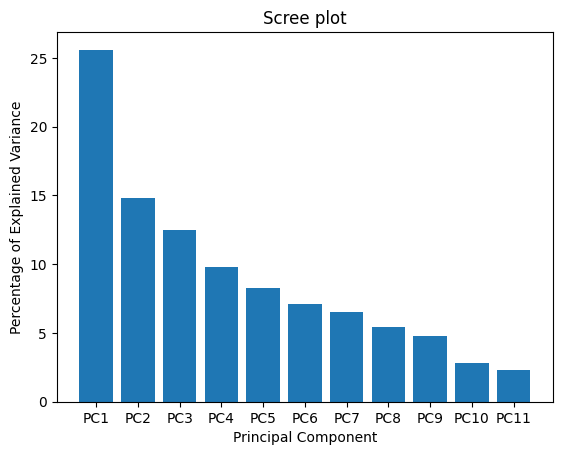

In [ ]:
plt.bar(x=range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree plot")
plt.show()

### Loadings Values

In [ ]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=col_labels, index=pca_data.columns)
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.41,0.28,-0.26,0.03,0.35,-0.12,0.16,0.02,-0.20,0.69,-0.09
convenient,-0.31,-0.05,-0.32,-0.01,-0.44,0.19,-0.66,0.15,-0.34,0.03,0.02
spicy,-0.02,0.07,0.02,0.85,-0.19,0.44,0.21,-0.03,0.03,0.06,-0.04
fattening,0.18,-0.21,-0.61,-0.02,0.09,0.11,-0.02,-0.72,0.11,-0.02,-0.07
greasy,0.27,-0.14,-0.39,0.33,0.34,-0.28,-0.31,0.49,0.35,-0.02,-0.03
fast,-0.21,-0.28,-0.21,0.09,-0.57,-0.57,0.39,0.06,0.10,0.02,-0.05
cheap,-0.29,-0.58,0.13,0.11,0.26,0.02,-0.01,-0.06,-0.06,0.06,0.69
tasty,-0.43,0.24,-0.27,0.07,0.29,-0.05,0.20,0.06,-0.21,-0.71,0.01
expensive,0.29,0.57,-0.18,0.04,-0.21,-0.17,0.02,-0.06,-0.01,0.03,0.69
healthy,-0.27,0.20,0.37,0.30,0.05,-0.45,-0.45,-0.45,0.22,-0.05,-0.09


## K-Mean clustering

In [ ]:
scaled_labels = [str(x) + "_T" for x in pca_data.columns]
scaled_df = pd.DataFrame(scal_fit, columns=scaled_labels)
scaled_df.head()

,yummy_T,convenient_T,spicy_T,fattening_T,greasy_T,fast_T,cheap_T,tasty_T,expensive_T,healthy_T,disgusting_T
0,-1.11,0.32,-0.32,0.39,-1.05,0.33,0.82,-1.35,1.34,-0.50,-0.57
1,0.90,0.32,-0.32,0.39,0.95,0.33,0.82,0.74,1.34,-0.50,-0.57
2,-1.11,0.32,3.11,0.39,0.95,0.33,-1.22,0.74,1.34,2.01,-0.57
3,0.90,0.32,-0.32,0.39,0.95,0.33,0.82,0.74,-0.75,-0.50,1.77
4,-1.11,0.32,-0.32,0.39,0.95,0.33,0.82,-1.35,-0.75,2.01,-0.57


In [ ]:
# using PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot
new_pca = PCA(n_components=2)
km_df = new_pca.fit_transform(scaled_df)
km_df = pd.DataFrame(km_df, columns=["PC1", "PC2"])
km_df

,PC1,PC2
0,0.78,-0.13
1,-0.22,-0.22
2,-0.38,1.72
3,0.34,-1.43
4,0.24,-1.13
...,...,...
1448,3.52,1.65
1449,-2.25,0.88
1450,-0.88,1.50
1451,-3.43,0.51


### Optimization function to find optimum numbers of clusters

In [ ]:
# create function to work out optimum no. of clusters

def optimise_k_means(df_data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  # generate elbow plot
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, "o-")
  plt.xlabel("No. of Clusters")
  plt.ylabel("Inertias")
  plt.grid(True)
  plt.show()

In [ ]:
optimise_k_means(km_df, 15)

### Applying K Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(km_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
k_mean_df = km_df
k_mean_df["kmeans_4"] = kmeans.labels_

k_mean_df.head()

,PC1,PC2,kmeans_4
0,0.78,-0.13,1
1,-0.22,-0.22,1
2,-0.38,1.72,2
3,0.34,-1.43,1
4,0.24,-1.13,1


### Plotting K Means clusters

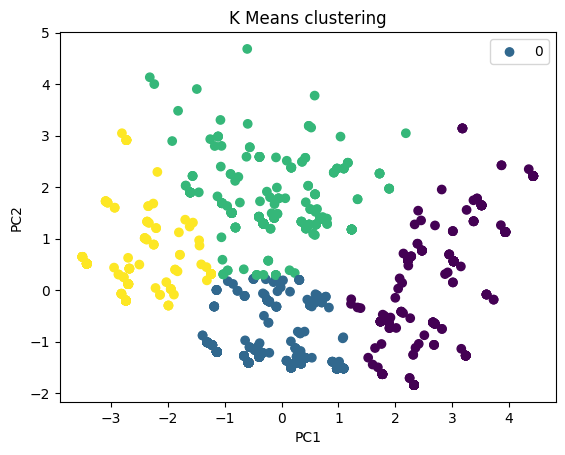

In [ ]:
plt.scatter(x=k_mean_df["PC1"], y=k_mean_df["PC2"], c=k_mean_df["kmeans_4"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K Means clustering")
plt.show()

### Creating Multiple Clusters

In [ ]:
new_kmean_df = k_mean_df.drop("kmeans_4", axis=1)
new_kmean_df.head()

,PC1,PC2
0,0.78,-0.13
1,-0.22,-0.22
2,-0.38,1.72
3,0.34,-1.43
4,0.24,-1.13


In [ ]:
for k in range(1, 7):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(new_kmean_df)
  new_kmean_df[f"KMeans_{k}"] = kmeans.labels_

In [ ]:
new_kmean_df

,PC1,PC2,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
0,0.78,-0.13,0,0,2,0,1,5
1,-0.22,-0.22,0,1,2,0,1,0
2,-0.38,1.72,0,1,0,1,3,2
3,0.34,-1.43,0,1,2,0,1,5
4,0.24,-1.13,0,1,2,0,1,5
...,...,...,...,...,...,...,...,...
1448,3.52,1.65,0,0,1,2,2,1
1449,-2.25,0.88,0,1,0,3,0,3
1450,-0.88,1.50,0,1,0,1,3,2
1451,-3.43,0.51,0,1,0,3,0,3


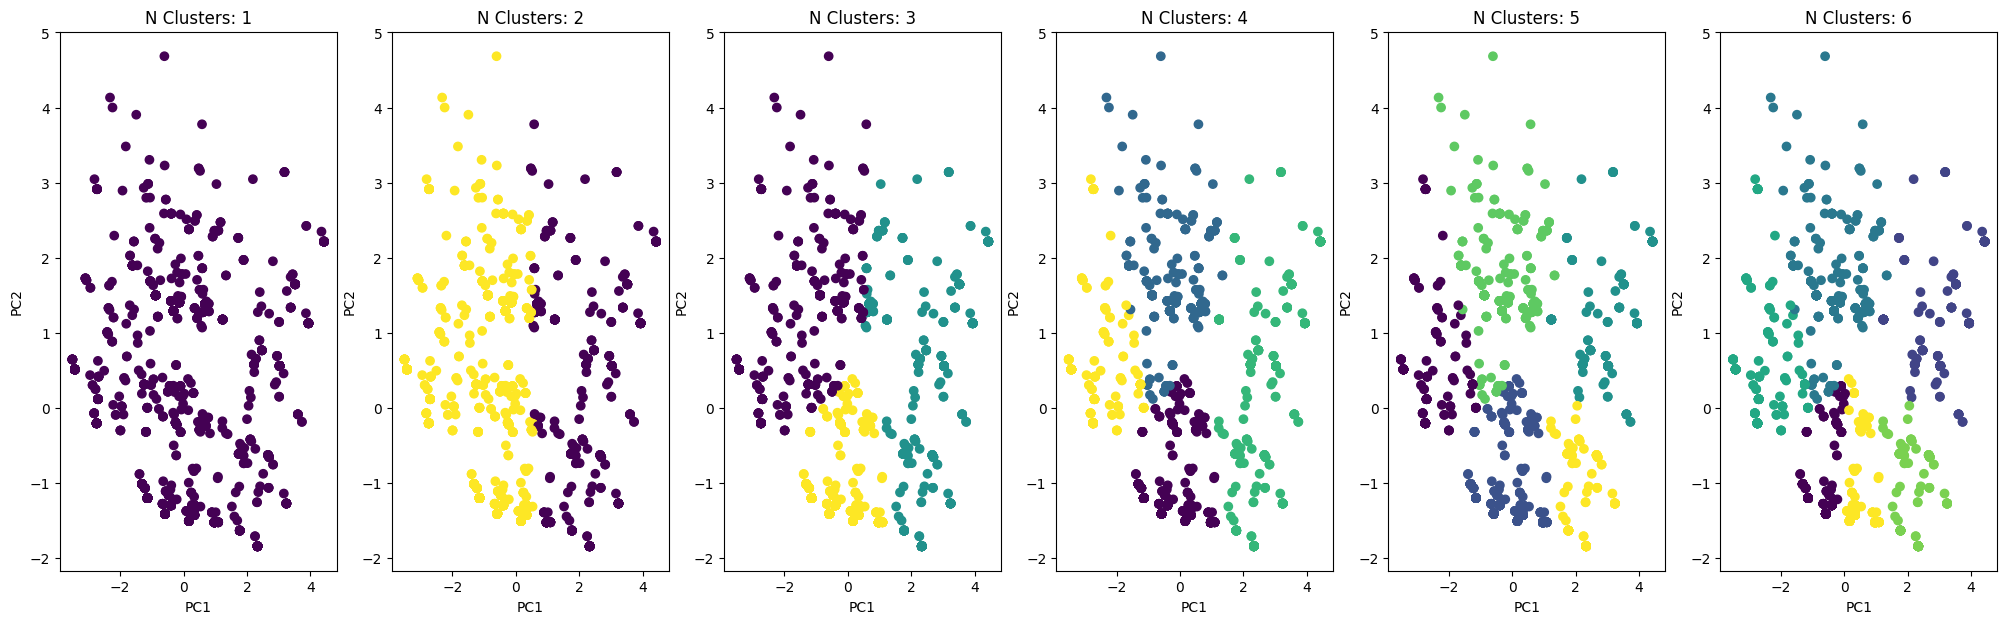

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(25, 7))

for i, ax in enumerate(fig.axes, start=1):
  ax.scatter(x=new_kmean_df["PC1"], y=new_kmean_df["PC2"], c=new_kmean_df[f"KMeans_{i}"])
  ax.set_xlabel("PC1")
  ax.set_ylabel("PC2")
  ax.set_title(f"N Clusters: {i}")